In [ ]:
#Chronic kidney disease prediction using AI 
#description : This program clasifies patients as having choronic kidney disease (ckd) or not 
#              using Artificical Neural Networks(ANN)

In [1]:
#import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import seaborn as sns
sns.set()

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('CKD_Preprocessed.csv')
#Print the first 5 rows
df.head()

Saving CKD_Preprocessed.csv to CKD_Preprocessed.csv


,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80,1.020,1.0,0,121.000000,36.0,1.2,136.0,4.7,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50,1.020,4.0,0,90.316581,18.0,0.8,140.0,4.0,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80,1.010,2.0,3,423.000000,53.0,1.8,135.0,4.8,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70,1.005,4.0,0,117.000000,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80,1.010,2.0,0,106.000000,26.0,1.4,140.0,4.0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
#Get the shape of the data (the number of rows & clos)
df.shape
#(769, 25) means we have 400 patients data and 25 points for each patient

(769, 25)

In [4]:
#Create a list of column names to keep
columns_to_retain = ['Specific Gravity','Albumin','Serum Creatinine (mgs/dL)','Hemoglobin (gms)','Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension: yes','Chronic Kidney Disease: yes']

#Drop the columns that are not in columns_to_retain
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)

#Drop the roes with na or missing values
df = df.dropna(axis=0)

In [5]:
#Transform the non-numeric data in the columns
#for column in df.columns:
 # if df[column].dtype == np.number:
  #  continue
 # df[column] = LabelEncoder().fit_transfore( df[column])

In [6]:
#Print the first 5 rows of the new created dataset
df.head()

,Specific Gravity,Albumin,Serum Creatinine (mgs/dL),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension: yes,Chronic Kidney Disease: yes
0,1.020,1.0,1.2,15.4,44.0,7800.0,5.200000,1,1
1,1.020,4.0,0.8,11.3,38.0,6000.0,4.721717,0,1
2,1.010,2.0,1.8,9.6,31.0,7500.0,3.400000,0,1
3,1.005,4.0,3.8,11.2,32.0,6700.0,3.900000,1,1
4,1.010,2.0,1.4,11.6,35.0,7300.0,4.600000,0,1


In [7]:
#Split the data into independent (x) dataset (the features) and dependent (y) dataset (the target)
x = df.drop(['Chronic Kidney Disease: yes'], axis=1)
y = df['Chronic Kidney Disease: yes']

In [8]:
#Feature Scaling
#min.max scaler method scales the data set to that all the input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [9]:
#Split the data into 80% training and 20%testing and shuffle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=True)

In [10]:
#Build the model
#sequential model
model = Sequential()
model.add( Dense(256, input_dim= len(x.columns) , kernel_initializer= k.initializers.random_normal(seed=13), activation='relu'))
model.add( Dense(1, activation='hard_sigmoid') )

In [11]:
#Compile the model
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [12]:
#Train the model
history = model.fit(x_train, y_train, epochs = 2500, batch_size= x_train.shape[0])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 1s/step - loss: 0.6855 - accuracy: 0.8634
Epoch 2/2500
1/1 [==============================] - 0s 13ms/step - loss: 0.6781 - accuracy: 0.8634
Epoch 3/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.6709 - accuracy: 0.8634
Epoch 4/2500
1/1 [==============================] - 0s 16ms/step - loss: 0.6638 - accuracy: 0.8634
Epoch 5/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.6569 - accuracy: 0.8618
Epoch 6/2500
1/1 [==============================] - 0s 14ms/step - loss: 0.6502 - accuracy: 0.8504
Epoch 7/2500
1/1 [==============================] - 0s 19ms/step - loss: 0.6436 - accuracy: 0.8407
Epoch 8/2500
1/1 [==============================] - 0s 11ms/step - loss: 0.6371 - accuracy: 0.8341
Epoch 9/2500
1/1 [==============================] - 0s 14ms/step - loss: 0.6307 - accuracy: 0.8211
Epoch 10/2500
1/1 [==============================] - 0s 10ms/step - loss:

In [13]:
#Save the model
model.save('ckd.model')

Text(0.5, 0, 'epoch')

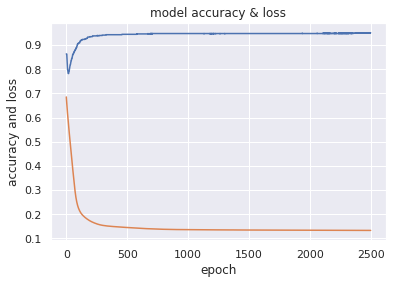

In [14]:
#Visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [15]:
#Get the shape of traning and testing data
print('shape of training data:', x_train.shape)
print('shape of test data:', x_test.shape)

shape of training data: (615, 8)
shape of test data: (154, 8)


In [16]:
#Show the actual and predicated values
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print('Original : {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

5/5 [==============================] - 0s 3ms/step
Original : 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0
Predicted : 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0


In [17]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [18]:
# Built in colab with local data upload

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CKD_Preprocessed.csv to CKD_Preprocessed (1).csv
User uploaded file "CKD_Preprocessed.csv" with length 59251 bytes


In [19]:
df = pd.read_csv(io.StringIO(uploaded['CKD_Preprocessed.csv'].decode('utf-8')))
df = df[['Specific Gravity','Albumin','Serum Creatinine (mgs/dL)','Hemoglobin (gms)','Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension: yes','Chronic Kidney Disease: yes']] 	

df.head()

,Specific Gravity,Albumin,Serum Creatinine (mgs/dL),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension: yes,Chronic Kidney Disease: yes
0,1.020,1.0,1.2,15.4,44.0,7800.0,5.200000,1,1
1,1.020,4.0,0.8,11.3,38.0,6000.0,4.721717,0,1
2,1.010,2.0,1.8,9.6,31.0,7500.0,3.400000,0,1
3,1.005,4.0,3.8,11.2,32.0,6700.0,3.900000,1,1
4,1.010,2.0,1.4,11.6,35.0,7300.0,4.600000,0,1


In [20]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [21]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

#Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [22]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['Specific Gravity','Albumin','Serum Creatinine (mgs/dL)','Hemoglobin (gms)','Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension: yes']] 	

y_train = train_df["Chronic Kidney Disease: yes"]

X_test = test_df[['Specific Gravity','Albumin','Serum Creatinine (mgs/dL)','Hemoglobin (gms)','Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension: yes']] 	

y_test = test_df["Chronic Kidney Disease: yes"]

In [23]:
y_test.head()

317    0
359    0
301    0
165    1
77     1
Name: Chronic Kidney Disease: yes, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,   1],
       [ 10,  42]])

array([[101,   1],
       [ 10,  42]])

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,   1],
       [ 10,  42]])

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

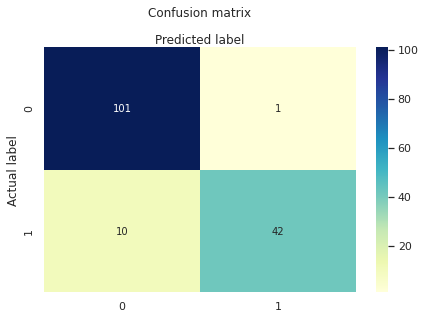

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9285714285714286
Precision: 0.9767441860465116
Recall: 0.8076923076923077


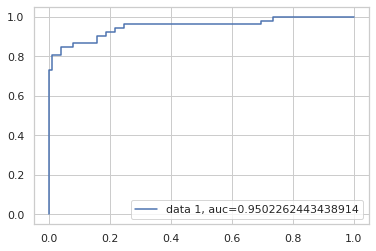

In [31]:
#predict_proba
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
accuracy_score(y_true, y_pred, normalize=False)

2

In [33]:
import numpy as np
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))


0.5

In [35]:
import numpy as np
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))


0.5

In [36]:
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix
#import matplotlib.pyplot as plt

# load the CKD dataset
#ckd = datasets.load_iris()

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ckd.data, ckd.target, test_size=0.3, random_state=42)

# initialize a decision tree classifier with a range of max_depth values
max_depths = range(1, 100)
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / sum(sum(conf_matrix))
    accuracies.append(accuracy)

# plot the accuracies against the max_depth values
plt.plot(max_depths, accuracies)
plt.xlabel('max_depth')
plt.ylabel('Accuracy:')
plt.title('Accuracy Graph for CKD Classification Using Confusion Matrix')
plt.show()


NameError: ignored

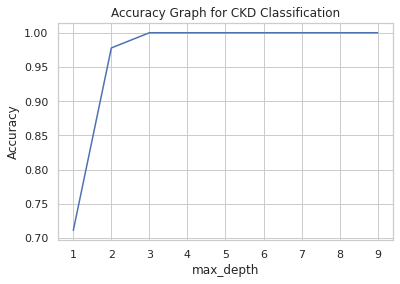

In [37]:
#accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load the CKD dataset
ckd = datasets.load_iris()

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ckd.data, ckd.target, test_size=0.3, random_state=42)

# initialize a decision tree classifier with a range of max_depth values
max_depths = range(1, 10)
acc_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)

# plot the accuracy scores against the max_depth values
plt.plot(max_depths, acc_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph for CKD Classification')
plt.show()


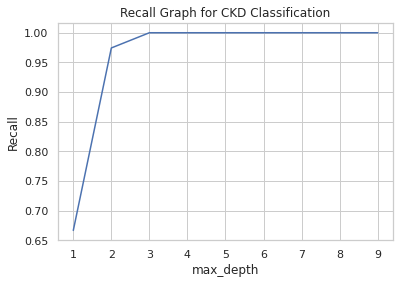

In [38]:
#recall_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# load the CKD dataset
ckd = datasets.load_iris()

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ckd.data, ckd.target, test_size=0.3, random_state=42)

# initialize a decision tree classifier with a range of max_depth values
max_depths = range(1, 10)
recall_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores.append(recall)

# plot the recall scores against the max_depth values
plt.plot(max_depths, recall_scores)
plt.xlabel('max_depth')
plt.ylabel('Recall')
plt.title('Recall Graph for CKD Classification')
plt.show()

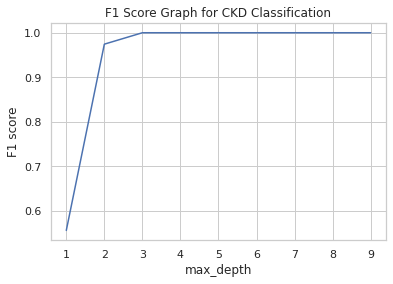

In [39]:
#f1_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# load the CKD dataset
ckd = datasets.load_iris()

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ckd.data, ckd.target, test_size=0.3, random_state=42)

# initialize a decision tree classifier with a range of max_depth values
max_depths = range(1, 10)
f1_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

# plot the F1 scores against the max_depth values
plt.plot(max_depths, f1_scores)
plt.xlabel('max_depth')
plt.ylabel('F1 score')
plt.title('F1 Score Graph for CKD Classification')
plt.show()